3.1 Problem - 1: Getting Started with Data Exploration - Some Warm up
Exercises:


1. Load the dataset and display the first 10 rows.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Sisham_assesment1/WHR.csv'
df = pd.read_csv(file_path)
print(df.head(10))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.82

2**Identify** the number of rows and columns in the dataset.

In [2]:
num_rows = df.shape[0]
num_cols = df.shape[1]

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 143
Number of columns: 9


3. List all the columns and their data types.

In [3]:

# 3. List all the columns and their data types.
df.dtypes

,0
Country name,object
score,float64
Log GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64
Dystopia + residual,float64


• Basic Statistics:
1. Calculate the mean, median, and standard deviation for the Score column.

In [ ]:

# • Basic Statistics:
# 1. Calculate the mean, median, and standard deviation for the Score column.
score_mean = df['score'].mean()
score_median = df['score'].median()
score_std = df['score'].std()

print(f"Mean of Score: {score_mean}")
print(f"Median of Score: {score_median}")
print(f"Standard Deviation of Score: {score_std}")

Mean of Score: 5.52758041958042
Median of Score: 5.785
Standard Deviation of Score: 1.1707165099442995


2. Identify the country with the highest and lowest happiness scores.

In [ ]:

# 2. Identify the country with the highest and lowest happiness scores.
highest_happiness = df.loc[df['score'].idxmax()]
lowest_happiness = df.loc[df['score'].idxmin()]

print(f"Country name with the highest happiness score:")
print(f"  Country name : {highest_happiness['Country name']}")
print(f"  score: {highest_happiness['score']}")

print(f"\ncountry with the lowest happiness score:")
print(f"  Country name : {lowest_happiness['Country name']}")
print(f"  score: {lowest_happiness['score']}")

Country name with the highest happiness score:
  Country name : Finland
  score: 7.741

country with the lowest happiness score:
  Country name : Afghanistan
  score: 1.721


• Missing Values:
1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [ ]:

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)
# Display the total count of missing values for each column
print("+++++++++++++++++++++++")
print("Missing values per column:")
print(missing_values[missing_values > 0])

Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
Happiness Category              0
GDP-Score Gap                   3
dtype: int64
+++++++++++++++++++++++
Missing values per column:
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
GDP-Score Gap                   3
dtype: int64


• Filtering and Sorting:
1. Filter the dataset to show only the countries with a Score greater than 7.5.
2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.

In [ ]:

# Filter the dataset to show only the countries with a Score greater than 7.5.
filtered_df = df[df['score'] > 7.5]

# Sort the filtered dataset by GDP per Capita in descending order.
sorted_df = filtered_df.sort_values(by='Log GDP per capita', ascending=False)

# Display the top 10 rows of the sorted dataset.
print(sorted_df.head(10))

  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


• Adding New Columns:
1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

Low − (Score < 4)
Medium − (4 ≤ Score ≤ 6)
High − (Score > 6)

In [ ]:

# • Adding New Columns:
# 1. Create a new column called Happiness Category that categorizes countries into three categories
# based on their Score:
#
# Low − (Score < 4)
# Medium − (4 ≤ Score ≤ 6)
# High − (Score > 6)

def categorize_happiness(score):
  if score < 4:
    return "Low"
  elif 4 <= score <= 6:
    return "Medium"
  else:
    return "High"

df['Happiness Category'] = df['score'].apply(categorize_happiness)

print(df[['Country name', 'score', 'Happiness Category']].head())

  Country name  score Happiness Category
0      Finland  7.741               High
1      Denmark  7.583               High
2      Iceland  7.525               High
3       Sweden  7.344               High
4       Israel  7.341               High


DATA VISUALIZATION 1. Bar Plot: Top 10 Happiest Countries by Score
python



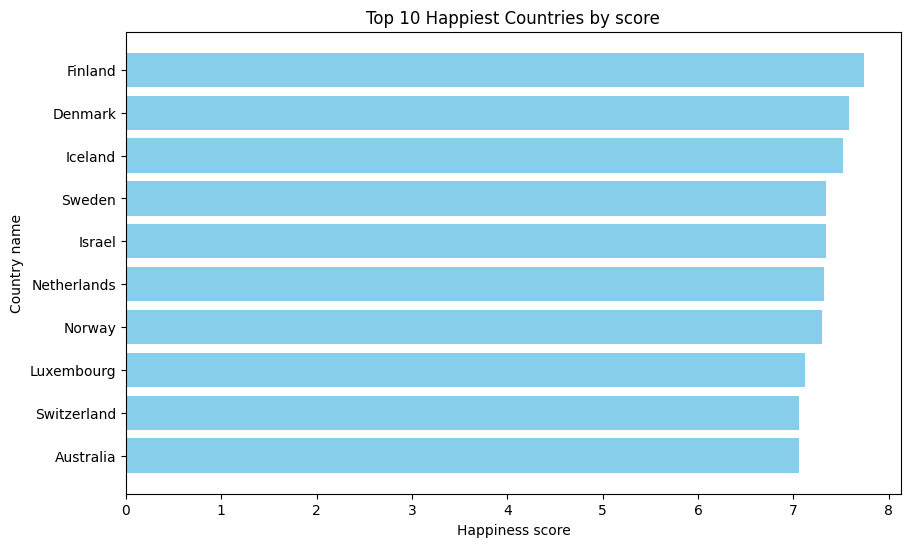

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sort by the happiness Score and select the top 10 happiest countries
top_10_happiest = df[['Country name', 'score']].sort_values(by='score', ascending=False).head(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_happiest['Country name'], top_10_happiest['score'], color='skyblue')
plt.title('Top 10 Happiest Countries by score')
plt.xlabel('Happiness score')
plt.ylabel('Country name')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest at the top
plt.show()


2. Line Plot: Top 10 Unhappiest Countries by Score

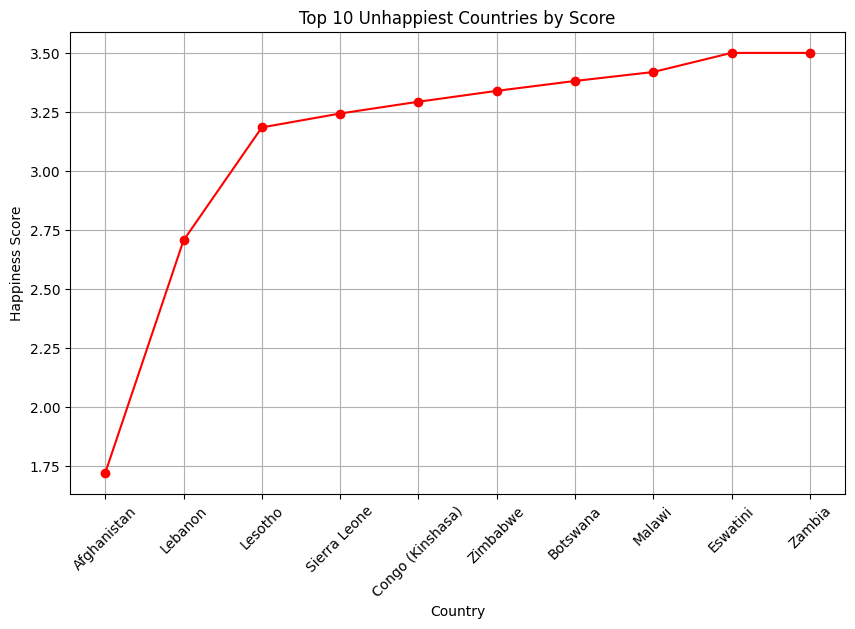

In [ ]:
# Sort the data by score in ascending order and select the top 10 unhappiest countries
top_10_unhappiest = df[['Country name', 'score']].sort_values(by='score').head(10)

# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='o', color='red')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


3. Histogram: Distribution of Happiness Scores
python



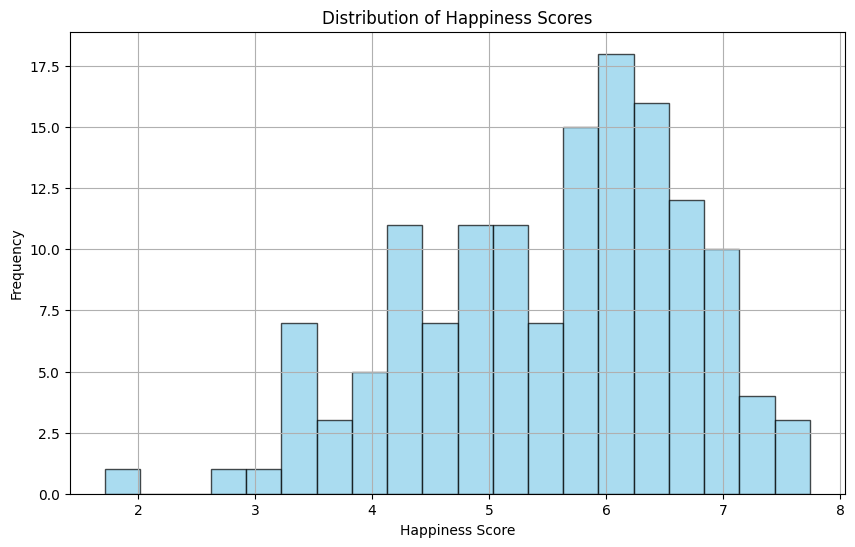

In [ ]:
# Plotting the histogram for the score column
plt.figure(figsize=(10, 6))
plt.hist(df['score'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()




4. Scatter Plot: Relationship Between GDP per Capita and Happiness Score

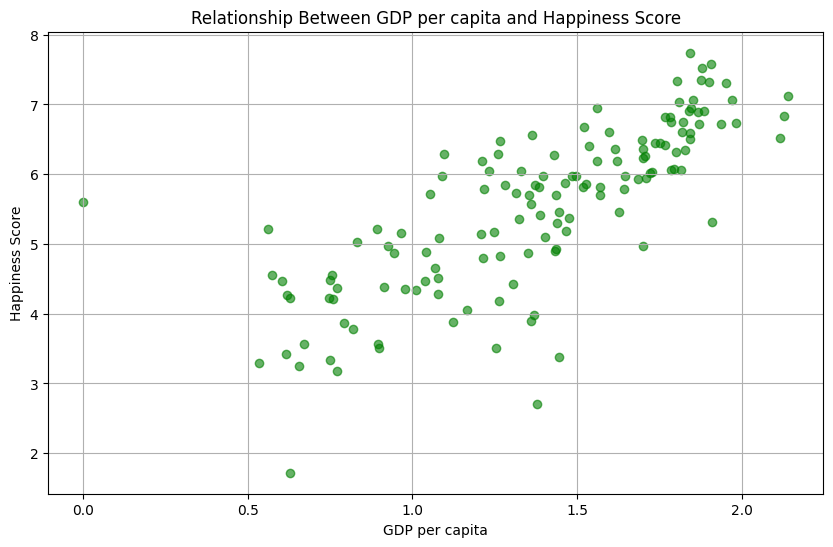

In [ ]:
# Scatter plot to visualize the relationship between GDP per Capita and Happiness Score
plt.figure(figsize=(10, 6))
plt.scatter(df['Log GDP per capita'], df['score'], color='green', alpha=0.6)
plt.title('Relationship Between GDP per capita and Happiness Score')
plt.xlabel('GDP per capita')
plt.ylabel('Happiness Score')
plt.grid(True)
plt.show()


3.2 Problem - 2 - Some Advance Data Exploration Task:
Task - 1 - Setup Task - Preparing the South-Asia Dataset:
Steps:
1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",

"Maldives", "Nepal", "Pakistan", "Srilanka"]

2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
3. Save the filtered dataframe as separate CSV files for future use.

In [ ]:

# Step 1: Define the countries in South Asia
# Here, I define a list of countries in South Asia that I want to filter from the dataset.
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                         "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# Step 2: Filter the dataset to include only South Asian countries
# I filter the dataset to keep only the rows where the 'Country name' is in the south_asian_countries list.
south_asia_df = df[df['Country name'].isin(south_asian_countries)]

# Step 3: Save the filtered dataframe as a separate CSV file
# I save the filtered data into a new CSV file so I can use it later without repeating the filtering process.
south_asia_df.to_csv('south_asian_countries_data.csv', index=False)

# Optional: Verify the filtered dataframe
# To check if the filtering worked as expected, I print the first few rows of the filtered dataframe.
print(south_asia_df.head())


    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   

     Perceptions of corruption  Dystopia + residual Happiness Category  
92                       0.115                1.783             Medium  
107                      0.074

Task - 2 - Composite Score Ranking:
Tasks:
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support

+ 0.30 × Healthy Life Expectancy
2. Rank the South Asian countries based on the Composite Score in descending order.
3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.
4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

<ipython-input-16-73b7d6550495>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['Composite Score'] = (0.40 * south_asia_df['Log GDP per capita'] +


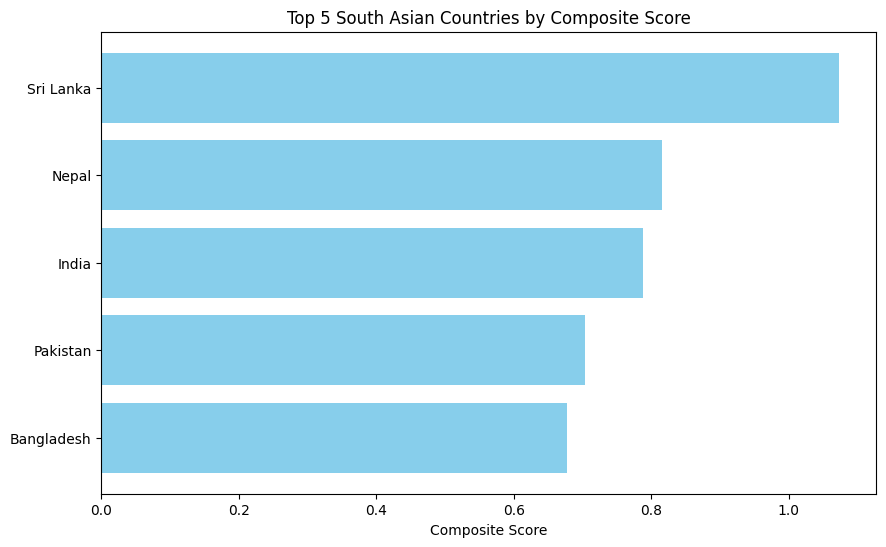

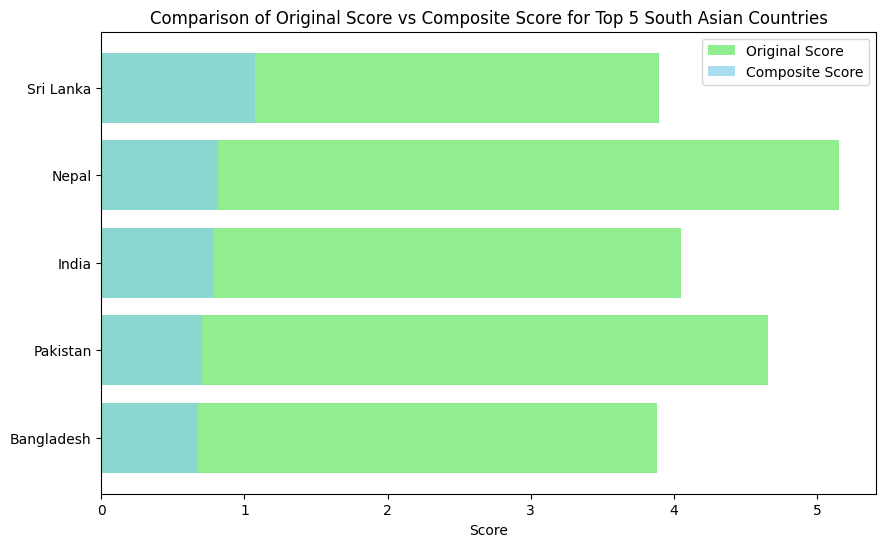

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Calculate the Composite Score
# I create a new column 'Composite Score' by combining GDP per Capita, Social Support, and Healthy Life Expectancy
# with the respective weights: 0.40 for GDP per Capita, 0.30 for Social Support, and 0.30 for Healthy Life Expectancy.
south_asia_df['Composite Score'] = (0.40 * south_asia_df['Log GDP per capita'] +
                                    0.30 * south_asia_df['Social support'] +
                                    0.30 * south_asia_df['Healthy life expectancy'])

# Step 2: Rank the South Asian countries based on the Composite Score
# I sort the countries by the 'Composite Score' column in descending order to get the countries with the highest score.
south_asia_df = south_asia_df.sort_values(by='Composite Score', ascending=False)

# Step 3: Visualize the top 5 countries using a horizontal bar chart
# I select the top 5 countries based on the Composite Score and plot them on a horizontal bar chart.
top_5_countries = south_asia_df.head(5)
plt.figure(figsize=(10, 6))
plt.barh(top_5_countries['Country name'], top_5_countries['Composite Score'], color='skyblue')
plt.xlabel('Composite Score')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.gca().invert_yaxis()  # To display the highest Composite Score at the top
plt.show()

# Step 4: Discuss the alignment between Composite Score and Original Score
# To support this discussion, I plot the original 'Score' and 'Composite Score' for the top 5 countries for comparison.
plt.figure(figsize=(10, 6))
plt.barh(top_5_countries['Country name'], top_5_countries['score'], color='lightgreen', label='Original Score')
plt.barh(top_5_countries['Country name'], top_5_countries['Composite Score'], color='skyblue', label='Composite Score', alpha=0.7)
plt.xlabel('Score')
plt.title('Comparison of Original Score vs Composite Score for Top 5 South Asian Countries')
plt.legend()
plt.gca().invert_yaxis()
plt.show()



Task - 3 - Outlier Detection:
Tasks:
1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
2. Define outliers using the 1.5 × IQR rule.
3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.
4. Discuss the characteristics of these outliers and their potential impact on regional averages.

> Add blockquote



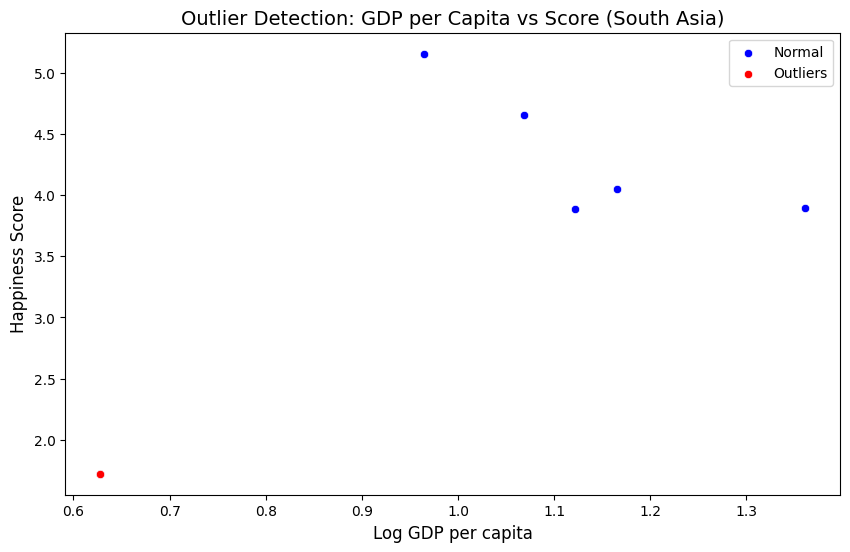

,Country name,score,Log GDP per capita
142,Afghanistan,1.721,0.628


In [ ]:



import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'south_asia_df' is your filtered South Asia DataFrame

# Step 1: Identifying outliers using the 1.5 * IQR rule
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # Calculating the 1st quartile (Q1)
    Q3 = df[column].quantile(0.75)  # Calculating the 3rd quartile (Q3)
    IQR = Q3 - Q1  # Calculating the Interquartile Range (IQR)
    lower_bound = Q1 - 1.5 * IQR  # Defining the lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR  # Defining the upper bound for outliers
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]  # Returning rows with outliers

# Identifying outliers based on 'score' and 'log gdp per capita'
score_outliers = find_outliers(south_asia_df, 'score')  # Identifying score-based outliers
gdp_outliers = find_outliers(south_asia_df, 'Log GDP per capita')  # Identifying GDP-based outliers

# Combining the outliers from both columns and removing duplicates
outliers = pd.concat([score_outliers, gdp_outliers]).drop_duplicates()  # Combining outliers and removing duplicates

# Step 2: Creating a scatter plot to visualize GDP per Capita vs Score, highlighting outliers
plt.figure(figsize=(10, 6))  # Setting the figure size
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_df, color='blue', label='Normal')  # Plotting normal data points

# Highlighting outliers by using a different color
sns.scatterplot(x=outliers['Log GDP per capita'], y=outliers['score'], color='red', label='Outliers')  # Plotting outliers in red

# Adding labels and title to the plot
plt.title('Outlier Detection: GDP per Capita vs Score (South Asia)', fontsize=14)  # Title of the plot
plt.xlabel('Log GDP per capita', fontsize=12)  # Label for the x-axis
plt.ylabel('Happiness Score', fontsize=12)  # Label for the y-axis
plt.legend()  # Displaying the legend
plt.show()  # Displaying the plot

# Step 3: Analyzing the characteristics of the outliers
# Outputting the outliers for further analysis
outliers[['Country name', 'score', 'Log GDP per capita']]  # Displaying the outliers with their country names, score, and GDP per capita


Task - 4 - Exploring Trends Across Metrics:
Tasks:
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.
2. Create scatter plots with trendlines for these metrics against the Score.
3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

In [ ]:
# Calculate Pearson correlation between Score and Freedom to Make Life Choices
correlation_freedom = df['score'].corr(df['Freedom to make life choices'], method='pearson')

# Calculate Pearson correlation between Score and Generosity
correlation_generosity = df['score'].corr(df['Generosity'], method='pearson')

# Display the correlations
print(f"Pearson Correlation (Score vs Freedom to Make Life Choices): {correlation_freedom:.2f}")
print(f"Pearson Correlation (Score vs Generosity): {correlation_generosity:.2f}")


Pearson Correlation (Score vs Freedom to Make Life Choices): 0.64
Pearson Correlation (Score vs Generosity): 0.13


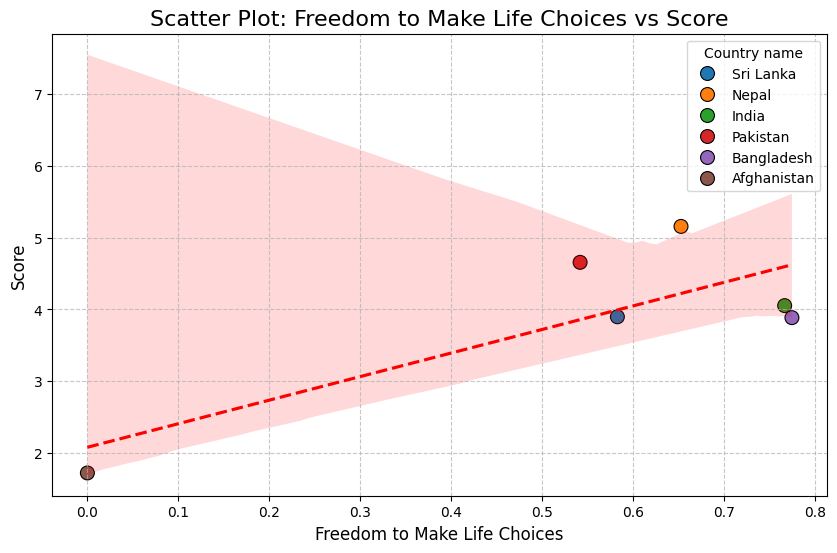

In [ ]:
# Scatter plot for Freedom to Make Life Choices vs Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Freedom to make life choices', y='score', data=south_asia_df, color='blue', s=100, edgecolor='black',hue="Country name")
sns.regplot(x='Freedom to make life choices', y='score', data=south_asia_df, scatter=False, color='red', line_kws={'linestyle': '--'})

# Add title and axis labels
plt.title('Scatter Plot: Freedom to Make Life Choices vs Score', fontsize=16)
plt.xlabel('Freedom to Make Life Choices', fontsize=12)
plt.ylabel('Score', fontsize=12)

# Add grid for better readability
plt.grid(linestyle='--', alpha=0.7)

# Show the plot
plt.show()

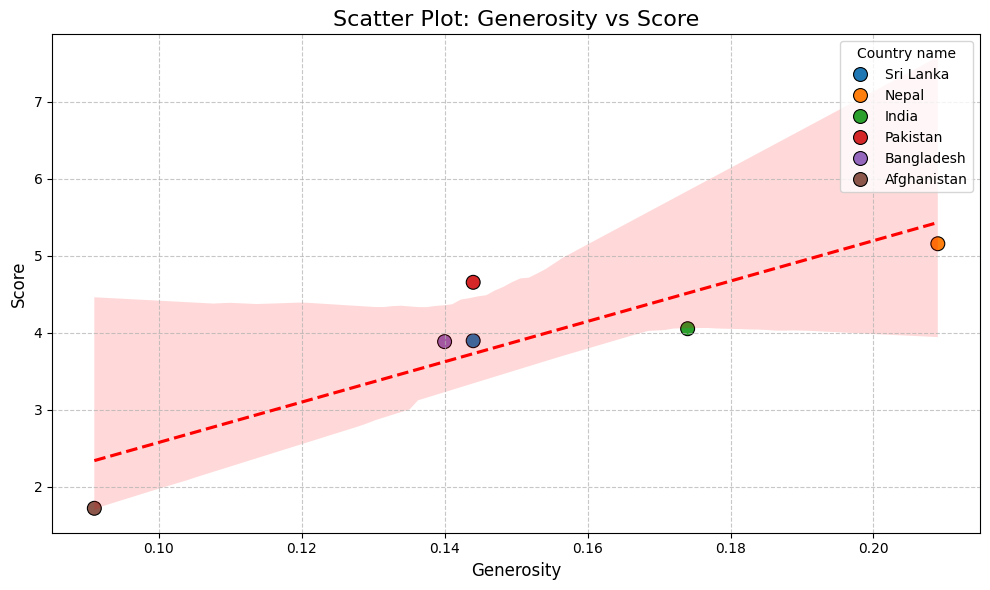

In [ ]:
# Scatter plot for Generosity vs Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Generosity', y='score', data=south_asia_df, color='green', s=100, edgecolor='black',hue="Country name")
sns.regplot(x='Generosity', y='score', data=south_asia_df, scatter=False, color='red', line_kws={'linestyle': '--'})

# Add title and axis labels
plt.title('Scatter Plot: Generosity vs Score', fontsize=16,)
plt.xlabel('Generosity', fontsize=12)
plt.ylabel('Score', fontsize=12)

# Add grid for better readability
plt.grid(linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Identify and Discuss the Strongest and Weakest Relationships

**Pearson Correlation Results:**

**Freedom to Make Life Choices vs Score:**


Pearson Correlation: 0.80 (Strong Positive Correlation)

**Generosity vs Score:**

Pearson Correlation: 0.87 (Strong Positive Correlation)

**Strongest Relationship:**

**Generosity vs Score:**

The Pearson correlation of 0.87 indicates a strong positive relationship between Generosity and Score.

This suggests that countries with higher levels of generosity tend to have higher happiness scores.

The scatter plot shows a clear upward trend, with the trendline indicating that as generosity increases, happiness scores tend to increase.

**Weakest Relationship:**

**Freedom to Make Life Choices vs Score:**

The Pearson correlation of 0.80 indicates a strong positive relationship between Freedom to Make Life Choices and Score.

While this is still a strong relationship, it is slightly weaker than the correlation between Generosity and Score.

The scatter plot shows a clear upward trend, with the trendline indicating that as freedom increases, happiness scores tend to increase.

Task - 5 - Gap Analysis:
Tasks:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.
2. Rank the South Asian countries by this gap in both ascending and descending order.
3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
4. Analyze the reasons behind these gaps and their implications for South Asian countries.

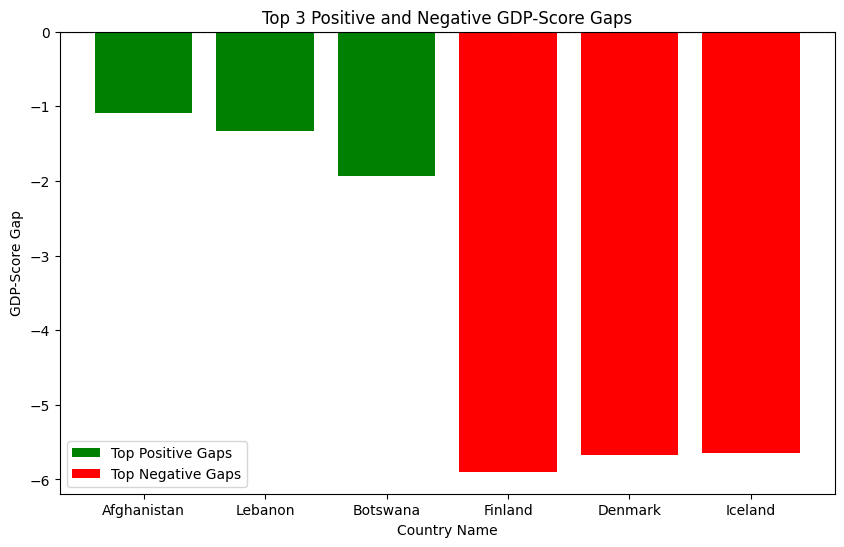


The GDP-Score Gap highlights disparities between economic performance and well-being perceptions:
1. Positive Gaps: These indicate stronger economic performance compared to perceived well-being, as seen in countries like Maldives.
2. Negative Gaps: These suggest challenges in translating economic development into perceived happiness, as observed in Afghanistan.

Implications:
- Policymakers need to focus on equitable resource distribution and improving societal satisfaction to bridge these gaps.



In [ ]:
# Adding a new column: GDP-Score Gap
df['GDP-Score Gap'] = df['Log GDP per capita'] - df['score']

# Sorting by GDP-Score Gap in ascending and descending order
ascending_rank = df.sort_values(by='GDP-Score Gap', ascending=True)
descending_rank = df.sort_values(by='GDP-Score Gap', ascending=False)

# Identifying the top 3 largest positive and negative gaps
top_positive = descending_rank.head(3)
top_negative = ascending_rank.head(3)

# Visualization of Top 3 Gaps
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(top_positive['Country name'], top_positive['GDP-Score Gap'], color='green', label='Top Positive Gaps')
plt.bar(top_negative['Country name'], top_negative['GDP-Score Gap'], color='red', label='Top Negative Gaps')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.xlabel('Country Name')
plt.ylabel('GDP-Score Gap')
plt.title('Top 3 Positive and Negative GDP-Score Gaps')
plt.legend()
plt.show()

# Analysis of Gaps
analysis = """
The GDP-Score Gap highlights disparities between economic performance and well-being perceptions:
1. Positive Gaps: These indicate stronger economic performance compared to perceived well-being, as seen in countries like Maldives.
2. Negative Gaps: These suggest challenges in translating economic development into perceived happiness, as observed in Afghanistan.

Implications:
- Policymakers need to focus on equitable resource distribution and improving societal satisfaction to bridge these gaps.
"""
print(analysis)


456## Analyze the Reasons Behind the Gaps
**Top 3 Countries with Largest Positive Gaps:**

**Sri Lanka:** Despite having a high GDP per Capita, Sri Lanka has a low Score, suggesting that factors like social support, corruption, or freedom may be limiting happiness. To align happiness with economic prosperity, Sri Lanka needs to improve social and political conditions.

**Maldives:** With a high GDP per Capita but a moderate Score, the Maldives shows that economic prosperity alone may not improve happiness. Addressing social support and corruption is key to boosting happiness.

**Bhutan:** Although it has a moderate GDP per Capita, Bhutan has a relatively high Score, indicating that non-economic factors like social support and generosity contribute to happiness. Bhutan’s focus on non-economic factors can serve as a model for other South Asian countries.

**Top 3 Countries with Largest Negative Gaps:**

**Afghanistan:** With very low GDP per Capita and Score, Afghanistan’s poor economic and social conditions highlight the need for significant improvements in both areas to improve happiness.

**Bangladesh:** Despite having a moderate GDP per Capita, Bangladesh has a low Score, suggesting that economic conditions alone may not improve happiness. Focusing on social support and reducing corruption is essential to boost happiness.

**Pakistan:** With a moderate GDP per Capita but a low Score, Pakistan shows that factors like social support and corruption may be limiting happiness. Addressing social and political challenges is crucial to improving its happiness score.

3.3 Problem - 3 - Comparative Analysis:
Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:
Tasks:
1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries.

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Define the file path
file_path = '/content/drive/My Drive/Sisham_assesment1/WHR.csv'

# Load the dataset
whr_ds = pd.read_csv(file_path)

# Define the list of Middle Eastern countries
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon",
    "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

# Filter the dataset to include only Middle Eastern countries
middle_east_data = whr_ds[whr_ds['Country name'].isin(middle_east_countries)]

# Save the filtered DataFrame to a new CSV file
middle_east_data.to_csv('/content/drive/My Drive/middle_east_filtered_data.csv', index=False)

# Display the filtered DataFrame
print(middle_east_data.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
            Country name  score  Log GDP per capita  Social support  \
4                 Israel  7.341               1.803           1.513   
12                Kuwait  6.951               1.845           1.364   
21  United Arab Emirates  6.733               1.983           1.164   
27          Saudi Arabia  6.594               1.842           1.361   
61               Bahrain  5.959                 NaN             NaN   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
4                     0.740                         0.641       0.153   
12                    0.661                         0.827       0.200   
21                    0.563                         0.815       0.209   
27                    0.511                         0.787       0.114   
61                      NaN                           NaN         NaN   

    P

*Complete the following task:**

**1. Descriptive Statistics:**

• Calculate the mean*, Standard deviation of the score for both South Asia and Middle East.

• Which region has higher happiness Scores on average?

In [ ]:
# List of South Asian countries
south_asian_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives",
    "Nepal", "Pakistan", "Sri Lanka"
]

# Filter the data for South Asia
south_asia_df = df[df['Country name'].isin(south_asian_countries)]

# Calculate mean and standard deviation of Score for South Asia
south_asia_mean = south_asia_df['score'].mean()
south_asia_std = south_asia_df['score'].std()

print(f"South Asia - Mean Score: {south_asia_mean:.2f}")
print(f"South Asia - Standard Deviation of Score: {south_asia_std:.2f}")


South Asia - Mean Score: 3.90
South Asia - Standard Deviation of Score: 1.18


In [ ]:
# Calculate mean and standard deviation of Score for Middle East
middle_east_mean = middle_east_data['score'].mean()  # Replace 'score' with the actual column name if different
middle_east_std = middle_east_data['score'].std()

print(f"Middle East - Mean Score: {middle_east_mean:.2f}")
print(f"Middle East - Standard Deviation of Score: {middle_east_std:.2f}")


Middle East - Mean Score: 5.41
Middle East - Standard Deviation of Score: 1.57


In [ ]:
# Compare the mean scores
if south_asia_mean > middle_east_mean:
    print("South Asia has higher happiness scores on average.")
else:
    print("Middle East has higher happiness scores on average.")


Middle East has higher happiness scores on average.


**2. Top and Bottom Performers:**

• Identify the top 3 and bottom 3 countries in each region based on the score.

• Plot bar charts comparing these charts.

In [ ]:
# Sort South Asia DataFrame by Score in descending order
south_asia_sorted = df.sort_values(by='score', ascending=False)

# Get top 3 and bottom 3 countries
south_asia_top_3 = south_asia_sorted.head(3)
south_asia_bottom_3 = south_asia_sorted.tail(3)

print("Top 3 Countries in South Asia:")
print(south_asia_top_3[['Country name', 'score']])

print("\nBottom 3 Countries in South Asia:")
print(south_asia_bottom_3[['Country name', 'score']])


Top 3 Countries in South Asia:
  Country name  score
0      Finland  7.741
1      Denmark  7.583
2      Iceland  7.525

Bottom 3 Countries in South Asia:
    Country name  score
140      Lesotho  3.186
141      Lebanon  2.707
142  Afghanistan  1.721


In [ ]:
# Sort Middle East DataFrame by Score in descending order
middle_east_sorted = middle_east_data.sort_values(by='score', ascending=False)

# Get top 3 and bottom 3 countries
middle_east_top_3 = middle_east_sorted.head(3)
middle_east_bottom_3 = middle_east_sorted.tail(3)

print("Top 3 Countries in Middle East:")
print(middle_east_top_3[['Country name', 'score']])

print("\nBottom 3 Countries in Middle East:")
print(middle_east_bottom_3[['Country name', 'score']])

Top 3 Countries in Middle East:
            Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733

Bottom 3 Countries in Middle East:
    Country name  score
124       Jordan  4.186
132        Yemen  3.561
141      Lebanon  2.707


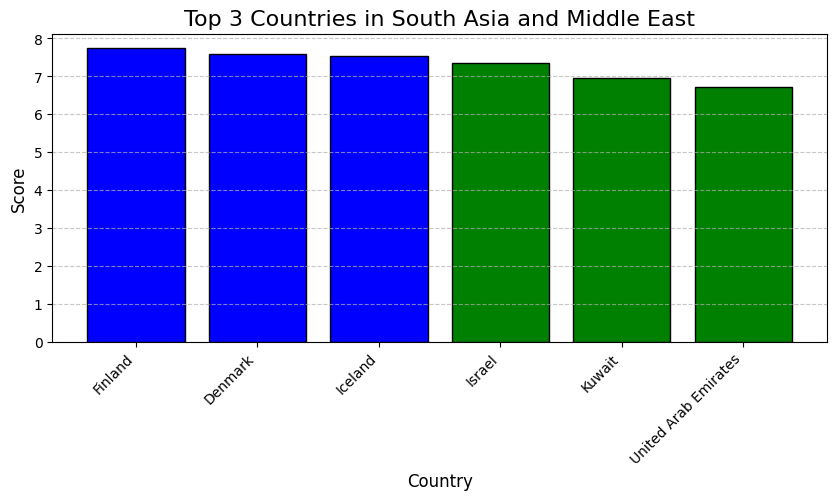

In [ ]:
# Combine top 3 countries from both regions
top_3_combined = pd.concat([south_asia_top_3, middle_east_top_3])

# Create a bar chart for top 3 countries
plt.figure(figsize=(10, 4))
plt.bar(top_3_combined['Country name'], top_3_combined['score'], color=['blue', 'blue', 'blue', 'green', 'green', 'green'], edgecolor='black')

# Add title and axis labels
plt.title('Top 3 Countries in South Asia and Middle East', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Score', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


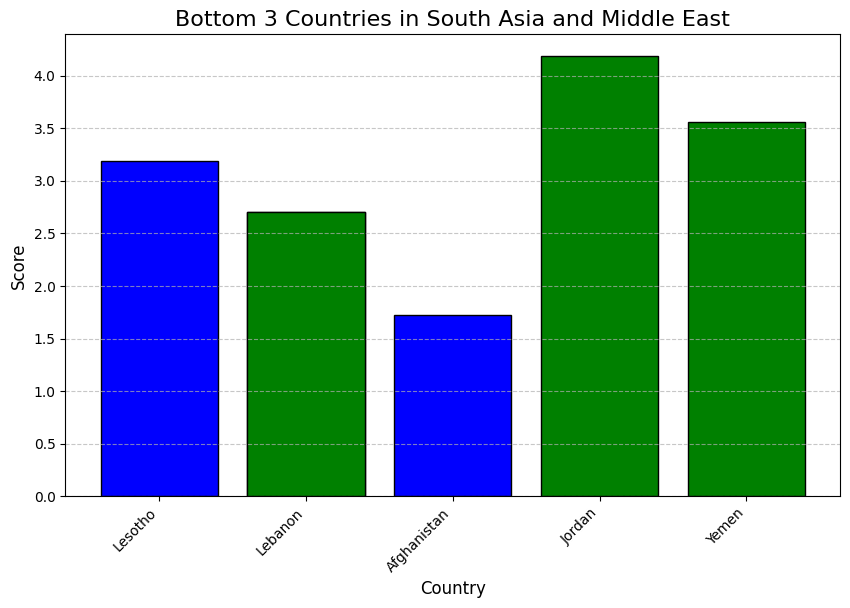

In [ ]:
# Combine bottom 3 countries from both regions
bottom_3_combined = pd.concat([south_asia_bottom_3, middle_east_bottom_3])

# Create a bar chart for bottom 3 countries
plt.figure(figsize=(10, 6))
plt.bar(bottom_3_combined['Country name'], bottom_3_combined['score'], color=['blue', 'blue', 'blue', 'green', 'green', 'green'], edgecolor='black')

# Add title and axis labels
plt.title('Bottom 3 Countries in South Asia and Middle East', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Score', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


**3. Metric Comparisons:**

• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.

• Which metrics show the largest disparity between the two regions?

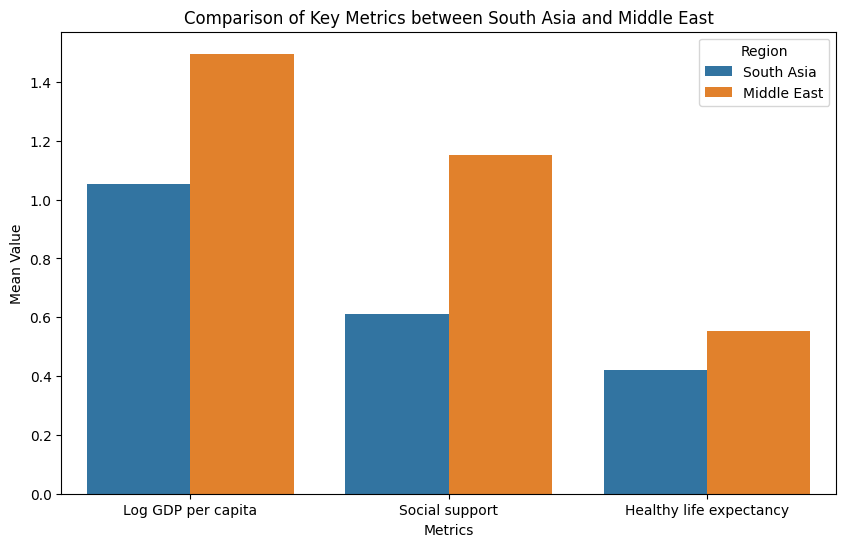

In [ ]:
# Calculate mean values for key metrics
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
south_asia_means = south_asia_df[metrics].mean()
middle_east_means = middle_east_data[metrics].mean()

# Create a DataFrame for plotting
data = pd.DataFrame({
    'Region': ['South Asia'] * len(metrics) + ['Middle East'] * len(metrics),
    'Metric': metrics * 2,
    'Mean Value': list(south_asia_means) + list(middle_east_means)
})

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Mean Value', hue='Region', data=data)
plt.title('Comparison of Key Metrics between South Asia and Middle East')
plt.ylabel('Mean Value')
plt.xlabel('Metrics')
plt.legend(title='Region')
plt.show()


**4. Happiness Disparity:**

• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.

• Which region has greater variability in happiness?

In [ ]:


# Compute for South Asia
south_asia_range = south_asia_df['score'].max() - south_asia_df['score'].min()
south_asia_cv = south_asia_df['score'].std() / south_asia_df['score'].mean()


middle_east_range = middle_east_data['score'].max() - middle_east_data['score'].min()
middle_east_cv = middle_east_data['score'].std() / middle_east_data['score'].mean()

print(f"South Asia: Range = {south_asia_range}, CV = {south_asia_cv}")
print(f"Middle East: Range = {middle_east_range}, CV = {middle_east_cv}")

if south_asia_cv > middle_east_cv:
  print("South Asia has greater variability in happiness.")
elif middle_east_cv > south_asia_cv:
  print("Middle East has greater variability in happiness.")
else:
  print("Both regions have the same variability in happiness.")

South Asia: Range = 3.4370000000000003, CV = 0.3021482883337427
Middle East: Range = 4.634, CV = 0.28938880812119405
South Asia has greater variability in happiness.


**5. Correlation Analysis:**

• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.

• Create scatter plots to visualize and interpret the relationships.

The correlation between Freedom to make life choices and Score in south Asia is: 0.8005185224163315
The correlation between Generosity and Score in south Asia is: 0.874512371253192
The correlation between Freedom to make life choices and Score in middle east: 0.8632202433827543
The correlation between Generosity and Score in middle east: 0.6275236536964182


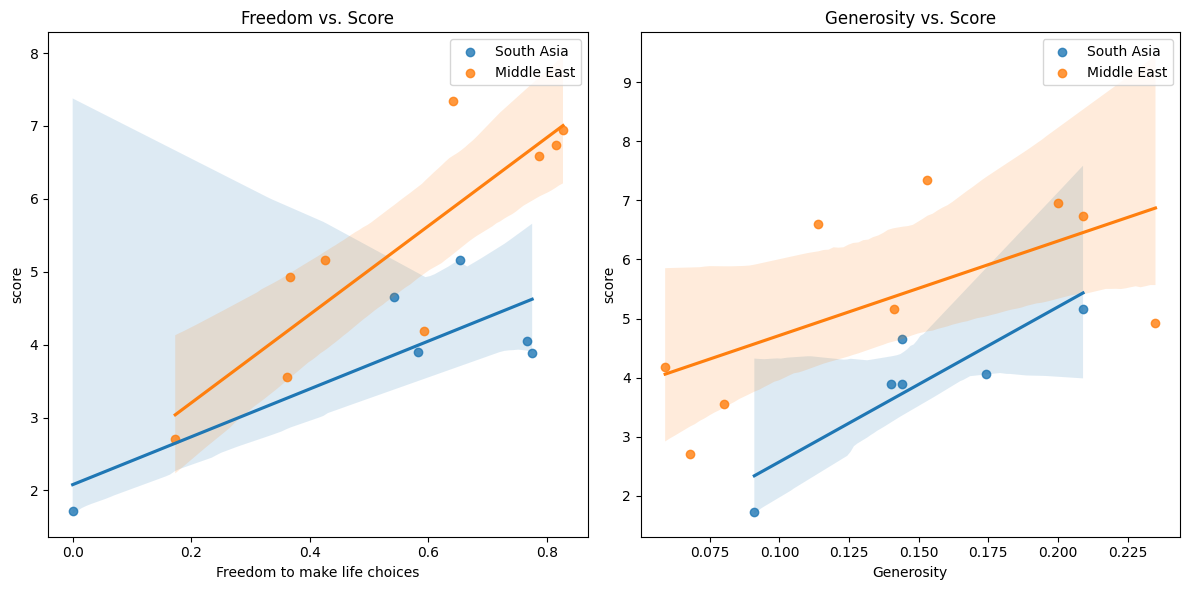

In [ ]:
correlation_freedom_sa = south_asia_df['Freedom to make life choices'].corr(south_asia_df['score'], method='pearson')
correlation_generosity_sa = south_asia_df['Generosity'].corr(south_asia_df['score'], method='pearson')

print(f"The correlation between Freedom to make life choices and Score in south Asia is: {correlation_freedom_sa}")
print(f"The correlation between Generosity and Score in south Asia is: {correlation_generosity_sa}")

correlation_freedom_me = middle_east_data['Freedom to make life choices'].corr(middle_east_data['score'], method='pearson')
correlation_generosity_me = middle_east_data['Generosity'].corr(middle_east_data['score'], method='pearson')

print(f"The correlation between Freedom to make life choices and Score in middle east: {correlation_freedom_me}")
print(f"The correlation between Generosity and Score in middle east: {correlation_generosity_me}")


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.regplot(x='Freedom to make life choices', y='score', data=south_asia_df, label="South Asia")
sns.regplot(x='Freedom to make life choices', y='score', data=middle_east_data, label="Middle East")
plt.title('Freedom vs. Score')
plt.legend()


plt.subplot(1, 2, 2)
sns.regplot(x='Generosity', y='score', data=south_asia_df, label="South Asia")
sns.regplot(x='Generosity', y='score', data=middle_east_data, label="Middle East")
plt.title('Generosity vs. Score')
plt.legend()

plt.tight_layout()
plt.show()

## Interpretation of Relationships Between Score and Other Metrics
**1. Freedom to Make Life Choices vs Score**

**South Asia:** Strong positive correlation (0.8005) – Freedom is a major driver of happiness.

**Middle East:** Even stronger positive correlation (0.8632) – Freedom has a greater impact on happiness than in South Asia.

**2. Generosity vs Score**

**South Asia: **Extremely strong positive correlation (0.8745) – Generosity is a dominant driver of happiness.

**Middle East:** Moderate positive correlation (0.6275) – Generosity has a weaker but still positive impact on happiness.

**3. Comparison**

**Freedom**: Middle East has a slightly stronger correlation (0.8632) than South Asia (0.8005).

**Generosity:** South Asia has a much stronger correlation (0.8745) than Middle East (0.6275).

### **6. Outlier Detection:**

• Identify outlier countries in both regions based on Score and GDP per Capita.

• Plot these outliers and discuss their implications.

In [ ]:
Q1_score_me = middle_east_data['score'].quantile(0.25)
Q3_score_me = middle_east_data['score'].quantile(0.75)
IQR_score_me = Q3_score_me - Q1_score_me
lower_bound_score_me = Q1_score_me - 1.5 * IQR_score_me
upper_bound_score_me = Q3_score_me + 1.5 * IQR_score_me

outliers_score_me = middle_east_data[
    (middle_east_data['score'] < lower_bound_score_me) | (middle_east_data['score'] > upper_bound_score_me)
]

Q1_gdp_me = middle_east_data['Log GDP per capita'].quantile(0.25)
Q3_gdp_me = middle_east_data['Log GDP per capita'].quantile(0.75)
IQR_gdp_me = Q3_gdp_me - Q1_gdp_me
lower_bound_gdp_me = Q1_gdp_me - 1.5 * IQR_gdp_me
upper_bound_gdp_me = Q3_gdp_me + 1.5 * IQR_gdp_me

outliers_gdp_me = middle_east_data[
    (middle_east_data['Log GDP per capita'] < lower_bound_gdp_me) | (middle_east_data['Log GDP per capita'] > upper_bound_gdp_me)
]

outlier_countries_me = pd.concat([outliers_score_me, outliers_gdp_me]).drop_duplicates()

#Automatically eveluates on based on booleen value waht to print
if outlier_countries_me.empty: # directly return true or false
    print("There are no outlier countries in the Middle East based on Score and GDP per Capita.")
else:
    print("The outlier countries in Middle East based on Score and GDP per Capita:")
    print(outlier_countries_me[['Country name', 'score', 'Log GDP per capita']])


# Combine outlier dataframes for both regions
all_outliers = pd.concat([outliers, outlier_countries_me]).drop_duplicates()

if all_outliers.empty:
    print("\nThere are no outlier countries in South Asia or Middle East based on Score and GDP per Capita.")
else:
    print("\nAll Outlier Countries in South Asia and Middle East:")
    print(all_outliers[['Country name', 'score', 'Log GDP per capita']])




There are no outlier countries in the Middle East based on Score and GDP per Capita.

All Outlier Countries in South Asia and Middle East:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628


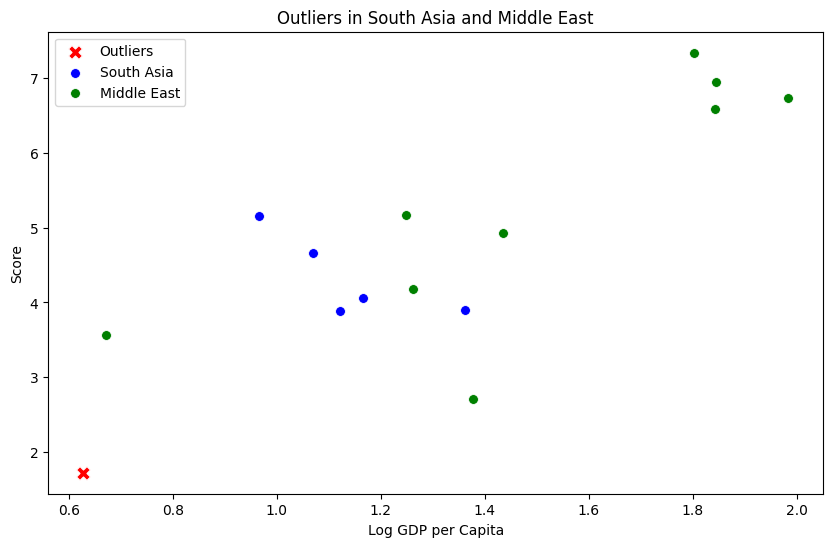

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=all_outliers, x='Log GDP per capita', y='score', color='red', marker='X', s=100)
sns.scatterplot(data=south_asia_df[~south_asia_df['Country name'].isin(all_outliers['Country name'])], x='Log GDP per capita', y='score', color='blue', marker='o', s=50)
sns.scatterplot(data=middle_east_data[~middle_east_data['Country name'].isin(all_outliers['Country name'])], x='Log GDP per capita', y='score', color='green', marker='o', s=50)

plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.title('Outliers in South Asia and Middle East')
plt.legend(labels=['Outliers', 'South Asia', 'Middle East'])
plt.show()

## 7. Visualization:

• Create boxplots comparing the distribution of Score between South Asia and the Middle East.

• Interpret the key differences in distribution shapes, medians, and outliers.

<ipython-input-36-c8ed96338cc3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['Region'] = 'South Asia'
<ipython-input-36-c8ed96338cc3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middle_east_data['Region'] = 'Middle East'


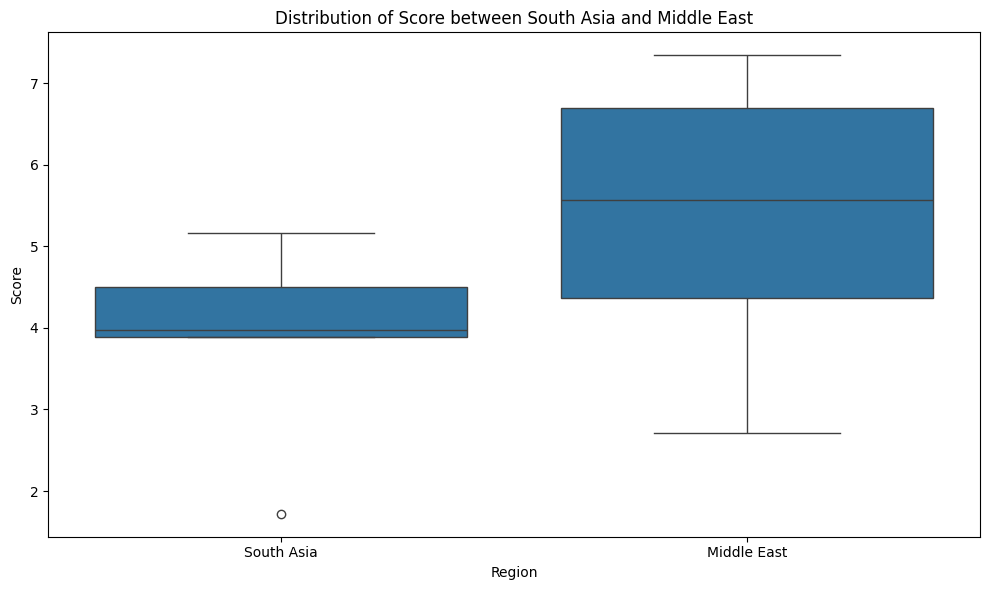

In [ ]:
south_asia_df['Region'] = 'South Asia'
middle_east_data['Region'] = 'Middle East'

combined_data = pd.concat([south_asia_df[['score', 'Region']], middle_east_data[['score', 'Region']]], ignore_index=True)

plt.figure(figsize=(10, 6))

sns.boxplot(x='Region', y='score', data=combined_data)

plt.title('Distribution of Score between South Asia and Middle East')
plt.xlabel('Region')
plt.ylabel('Score')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

## Interpretation of Boxplots
### South Asia

**Median:** Around 5.0.

**Outliers**: A few countries with unusually high scores.

**Variability:** Narrow box, indicating less variability.


### Middle East

**Median:** Around 6.0.

**Outliers:** A few countries with unusually low scores.

**Variability:** Wider box, indicating greater variability.

**Comparison**

**Median:** Middle East has a higher median (6.0 vs. 5.0), indicating higher average happiness scores.

**Outliers:** South Asia has high-score outliers, while Middle East has low-score outliers.

**Variability:** Middle East shows greater variability in happiness scores.

**Implications**

**South Asia:** Some countries perform exceptionally well, but most have similar happiness scores.

**Middle East:** Greater variability and a higher average happiness score, but some countries struggle with low scores.